<a href="https://colab.research.google.com/github/AlphaKaba24/systemic_crisis_prediction/blob/main/africa_GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alpha Kaba
##Project 2 - Part 2 
###6/15/22

In [32]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
africa_df = pd.read_csv('/content/ObservationData_lavlqce.csv')
africa_df.head()

,Country,Year,Real per Capita GDP Growth Rate (annual %),Real GDP growth (annual %),"Gross domestic product, (constant prices US$)","Gross domestic product, current prices (current US$)",Final consumption expenditure (current US$),General government final consumption expenditure (current US$),Household final consumption expenditure (current US$),Gross capital formation (current US$),...,Imports of goods and services (% of GDP),"Central government, Fiscal Balance (Current US $)","Central government, total revenue and grants (Current US $)","Central government, total expenditure and net lending (Current US $)","Central government, Fiscal Balance (% of GDP)","Central government, total revenue and grants (% of GDP)","Central government, total expenditure and net lending (% of GDP)","Current account balance (Net, BoP, cur. US$)",Current account balance (As % of GDP),"Inflation, consumer prices (annual %)"
0,Malawi,1980,NaN,NaN,3038.14,2236.36,1104.30,238.76,865.54,306.24,...,21.48,-142.96,298.61,441.57,-6.39,13.35,19.75,-207.07,-9.26,NaN
1,Malawi,1981,-13.06,-10.81,2709.74,2236.40,1091.26,221.16,870.10,218.14,...,17.41,-133.47,276.61,410.09,-5.97,12.37,18.34,-86.71,-3.88,12.01
2,Malawi,1982,-0.93,1.44,2748.84,2113.68,1002.45,206.82,795.63,252.58,...,16.10,-119.21,254.71,373.92,-5.64,12.05,17.69,-91.15,-4.31,9.52
3,Malawi,1983,1.56,4.21,2864.70,2203.66,1037.06,200.81,836.26,278.87,...,15.73,-96.80,250.68,347.48,-4.39,11.38,15.77,-103.94,-4.72,13.77
4,Malawi,1984,0.54,3.92,2976.95,2157.88,1028.95,189.62,839.34,155.58,...,14.79,-78.94,239.30,318.24,-3.66,11.09,14.75,3.88,0.18,19.74


In [19]:
africa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2322 entries, 0 to 2321
Data columns (total 31 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Country                                                                2322 non-null   object 
 1   Year                                                                   2322 non-null   int64  
 2   Real per Capita GDP Growth Rate (annual %)                             2238 non-null   float64
 3   Real GDP growth (annual %)                                             2238 non-null   float64
 4   Gross domestic product, (constant prices US$)                          2292 non-null   float64
 5   Gross domestic product, current prices (current US$)                   2311 non-null   float64
 6   Final consumption expenditure  (current US$)                           2239 non-null   f

In [ ]:
africa_df.describe

In [5]:
print(africa_df.shape[0])

2322


In [13]:
africa_df.duplicated().sum()

0

No duplicates luckily

In [14]:
africa_df.isna().sum()

Country                                                                    0
Year                                                                       0
Real per Capita GDP Growth Rate (annual %)                                84
Real GDP growth (annual %)                                                84
Gross domestic product, (constant prices US$)                             30
Gross domestic product, current prices (current US$)                      11
Final consumption expenditure  (current US$)                              83
General government final consumption expenditure (current US$)            83
Household final consumption expenditure (current US$)                     83
Gross capital formation (current US$)                                     83
Gross capital formation, Private sector  (current US$)                   163
Gross capital formation, Public sector  (current US$)                    163
Exports of goods and services (current US$)                               83

The missing values represent such a small amount of the data so imputing might help us out here.

In [15]:
africa_df['Real per Capita GDP Growth Rate (annual %)'].value_counts()

 1.970000     8
 1.340000     6
 3.290000     5
 0.880000     5
 2.290000     5
             ..
-10.973042    1
 6.317935     1
-21.365892    1
 29.747806    1
 1.399660     1
Name: Real per Capita GDP Growth Rate (annual %), Length: 1691, dtype: int64

In [12]:
africa_df.dtypes

Country                                                                   object
Year                                                                       int64
Real per Capita GDP Growth Rate (annual %)                               float64
Real GDP growth (annual %)                                               float64
Gross domestic product, (constant prices US$)                            float64
Gross domestic product, current prices (current US$)                     float64
Final consumption expenditure  (current US$)                             float64
General government final consumption expenditure (current US$)           float64
Household final consumption expenditure (current US$)                    float64
Gross capital formation (current US$)                                    float64
Gross capital formation, Private sector  (current US$)                   float64
Gross capital formation, Public sector  (current US$)                    float64
Exports of goods and service

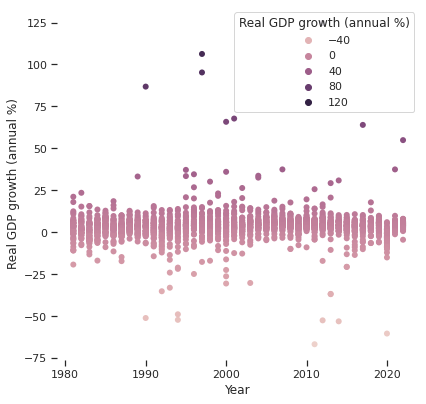

In [37]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x='Year', y='Real GDP growth (annual %)', hue='Real GDP growth (annual %)',sizes=(1, 8), linewidth=0, data=africa_df, ax=ax);

I think I want my target to be GDP growth per year; as GDP seems to always be a common economic growth identifier.